# Challenges Chapter 6 : Monte-Carlo

## Random Numbers

Avant toute chose, on commence par importer les modules appropriés.

In [69]:
import numpy as np
from scipy import optimize as opt
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

### 1)  Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in exponential and Gaussian generators with the versions implemented above.

Pour commencer, ona va tester des générateurs de nombres aléatoires de Python. Considérons d'abord le cas d'une distribution uniforme. Il y a la fonction $\textit{random_sample}$ qui renvoie un nombre donné de floats pseudo-aléatoires entre 0 et 1. 

In [3]:
x = np.random.random_sample(10)
x

array([0.88053945, 0.02287798, 0.20751502, 0.12883649, 0.03658635,
       0.84953678, 0.01541708, 0.48054122, 0.21292615, 0.12860219])

Le générateur $\textit{radint}(a,b)$ crée quant à lui un nombre entier aléatoire compris entre a et b.

In [4]:
x = np.random.randint(1,101)
x

88

Numpy dispose aussi de générateurs suivant plusieurs distributions classiques, notamment les distributions binomiale, gaussienne, Poisson, exponentielle ou encore la distribution Student. Nous illlustrons certaines de ces distributions ci-bas, et les comparons aux aux distributions attendues —excepté pour la distribution de Student, dont l'expression explicite est une série hypergéométrique non-triviale à implémenter. 

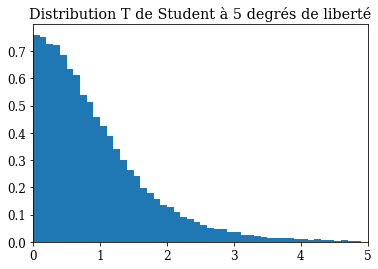

In [8]:
#Distribution de Student

x = np.random.standard_t(5, 100000)

# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=np.arange(0.,5., binwidth)
pyplot.hist(x,bins,density=True);
pyplot.title('Distribution T de Student à 5 degrés de liberté')
pyplot.show()

Vérifions à présent que les générateurs de distributions exponentielle et gaussienne définis dans le notebook donnent des résultats comparables aux fonctions correspondantes de numpy.

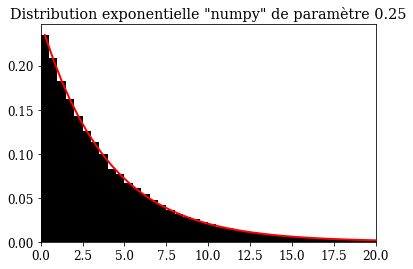

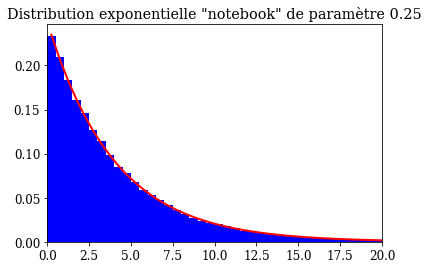

In [42]:
alpha = 0.25 # rate of the exponential distribution

#version numpy
x = np.random.exponential(1/alpha, 100000)

#version notebook
t = np.random.random_sample(100000)
y = -1/alpha*np.log(1-t)

# Plots

#numpy version 
binwidth=0.5
pyplot.xlim(0,20)
bins=np.arange(0.,21., binwidth)
pyplot.hist(x,bins,density=True,color='k');
# Compute centers of bins
xc = bins[:-1] + binwidth/2
z=alpha*np.exp(-alpha*xc)
pyplot.plot(xc,z, lw=2,color='r')
pyplot.title('Distribution exponentielle "numpy" de paramètre 0.25')
pyplot.show()

#notebook version
binwidth=0.5
pyplot.xlim(0,20)
bins=np.arange(0.,21., binwidth)
pyplot.hist(y,bins,density=True,color='b');
#center of bins
pyplot.plot(xc,z, lw=2, color='r')
pyplot.title('Distribution exponentielle "notebook" de paramètre 0.25')
pyplot.show()

Les deux générateurs d'exponentielles suivent très bien la fonction attendue. On pourrait éventuellement -mais c'est évidemment inutile ici— vérifier que la norme —dans un sens bien défini— de la différence entre la courbe et l'histogramme généré décroît à mesure que le nombre de points calculés est augmenté.

Remarquons que le paramètre requis pour la version numpy correspond à l'inverse de celui utilisé dans la version du notebook.

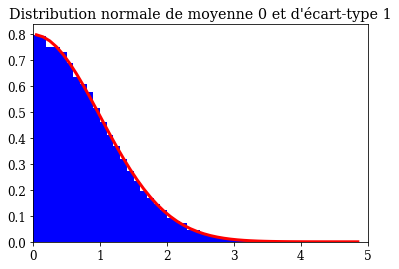

In [43]:
alpha = 0.25 # std error of the exponential distribution

#built-in version
x = np.random.standard_normal(100000)

# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=np.arange(0.,5., binwidth)
pyplot.hist(x,bins,density=True,color='b');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='red')
pyplot.title('Distribution normale de moyenne 0 et d\'écart-type 1')
pyplot.show()

Pour la distribution normale sur l'axe positif, la fonction numpy semble également donner des résultats équivalents à l'implémentation proposée dans le notebook.

### 2) Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

La méthode de Box-Muller transforme des variables uniformément distribuées en des variables
normalement distribuées, à l'aide d'une transformation de coordonnées polaires. Pour cela on utilise la *transformée de Box-Muller*. Soient $U_1$ et $U_2$ deux variables indépendantes
uniformément distribuées dans ]0,1]. On définit :

\begin{equation}
\left\{
    \begin{array}{ll}
    R= \sqrt{-2\ln{U_1}}\\
    \phi = 2\pi U_2
    \end{array}
\right.
\end{equation}

Les variables : 

\begin{equation}
\Rightarrow \left\{
    \begin{array}{ll}
    Z_0 = R \cos(\phi) \overset{def}{=} \sqrt{-2\ln{U_1}}\cos(2\pi U_2)\\
    Z_1 = R \sin(\phi) \overset{def}{=} \sqrt{-2\ln{U_1}}\sin(2\pi U_2)
    \end{array}
\right.
\end{equation}
   
sont alors des variables aléatoires indépendantes suivant une loi normale centrée réduite. La preuve consiste simplement à écrire la distribution normale en coordonnées polaires.
                               

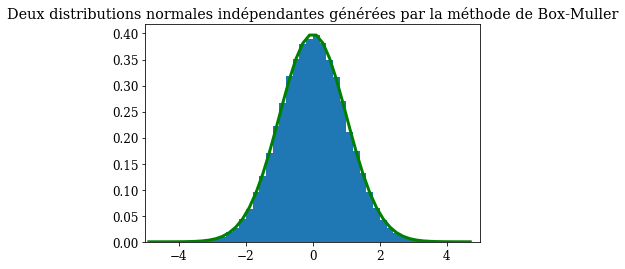

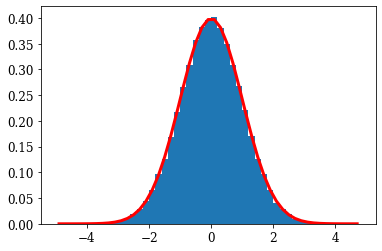

In [46]:
#Generate variables 
U1 = np.random.rand(100000)
U2 = np.random.rand(100000)
R = np.sqrt(-2*np.log(U1))
phi = 2*np.pi*U2
Z0 = R*np.cos(phi)
Z1 = R*np.sin(phi)

#Plot

#Histogram 1
binwidth=0.2
pyplot.xlim(-5,5)
bins=np.arange(-5.,5., binwidth)
pyplot.hist(Z0,bins,density=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='g')
pyplot.title('Deux distributions normales indépendantes générées par la méthode de Box-Muller')
pyplot.show()

#Histogram 2
pyplot.hist(Z1,bins,density=True);

# Compute centers of bins
pyplot.plot(xc,np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='r')
pyplot.show()

## Brownian motion

### 3)  Add as systematic contribution to the displacement $dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}$,  where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analytical solution for an initial Gaussian distribution?

On commence par régler les valeurs des paramètres du problèmes.

In [54]:
#Set Parameters

#Total simulation time
T=50.0
#Time step
dt=0.1
#Number of time steps
nt=int(T/dt)
#Diffusion parameter
alpha=1.0
#Systematic motion speed
c=0.4
#Number of particles


In [49]:
# Generate a set of initial positions based on the Gaussian distribution
N=100000

# We set mu=0
sigma = 2.0

x0 = np.random.normal(loc=0,scale=sigma,size=N)

In [52]:
#Implement time evolution

#define empty arrays to fill
t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,N])

#initial condition
x[0]=x0

#time evolution step
for i in range(nt):
    x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)


On peut tracer les graphes des positions de certaines particules pour vérifier que le mouvement est bien aléatoire mais décalé vers la droite.

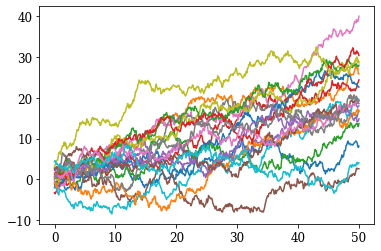

In [55]:
#Plot evolution of certain particles 
for i in range(20):
    pyplot.plot(t,x[:,i])

Traçons à présent les histogrammes normalisés des paquets de particules initiaux et finals.

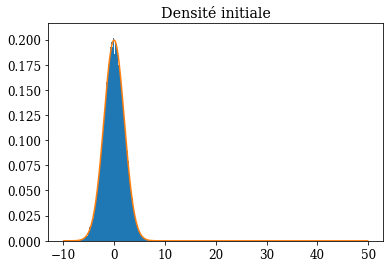

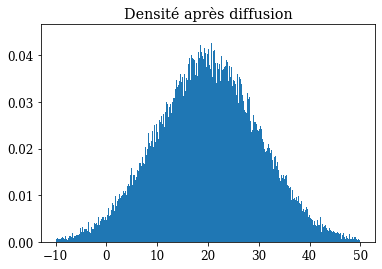

In [56]:
# Generate bins centered around 0
binwidth=0.1
bins=np.arange(-10,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
#Initial density
pyplot.hist(x0,bins,density=True);
pyplot.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigma**2))/np.sqrt(2*np.pi*sigma**2))
pyplot.title('Densité initiale')
pyplot.show()
#Final Density
pyplot.hist(x[nt],bins,density=True);
pyplot.title('Densité après diffusion')
pyplot.show()

On observe deux effets : d'une part, la gaussienne s'élargit à cause de la diffusion. D'autre part, elle se décale, on parle de *dérive*. Le phénomène d'ensemble est nommé "drift-diffusion" en anglais. Remarquons que le centre de la gaussienne s'est décalée de 20 unités, soit $0,4\cdot 50=c\cdot T$. Il est dès lors tentant de lui fitter une gaussienne de variance $\sigma_t^2= 2\alpha t + \sigma^2$ comme pour un phénomène de diffusion classique, mais en décalant la moyenne de $cT$.

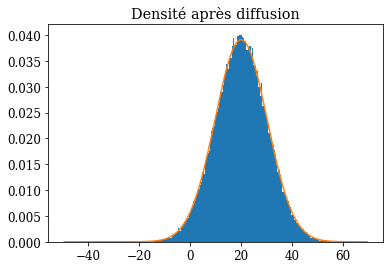

In [57]:
# Generate bins centered around 0
binwidth=0.5
bins=np.arange(-50,70,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

#Plot final density adjustement
pyplot.hist(x[nt],bins,density=True);

#time dependant std error
sigmat2=2*alpha*T+sigma**2

pyplot.plot(bin_centers, np.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))
pyplot.title('Densité après diffusion')
pyplot.show()

La justesse de l'ajustement est frappante ! Ecrivons quand même l'équation, pour vérifier qu'il s'agit effectivement de la solution analytique du problème. Il s'agit d'égaler la variation dans le temps de la densité  à une somme de deux termes : premièrement, un laplacien 1D (dérivée seconde) qui correspond à la diffusion; deuxièmement, un terme proportionnel au gradient 1D (dérivée première) qui correspond à la convection —mouvement de dérive.

\begin{equation}
\frac{\partial \rho}{\partial t} = \alpha \frac{\partial^2 \rho}{\partial x^2}-c \frac{\partial \rho}{\partial x} 
\end{equation}

Pour déterminer la solution de cette équation, il suffit d'appliquer le changement de variable à l'équation de drift-diffusion et d'observer qu'elle se réduit alors à l'équation de diffusion classique —ou utiliser l'ansatz obtenu numériquement. Prenons $x\rightarrow x'=x-ct$. En terme de $x'$, l'équation s'écrit :

\begin{equation}
\left\{
    \begin{array}{ll}
        \frac{\partial \rho}{\partial t}(x,t) = \frac{\partial \rho}{\partial t}(x',t) - c\frac{\partial \rho}{\partial x'}\\
        \frac{\partial \rho}{\partial x}(x,t) = \frac{\partial \rho}{\partial x'}(x',t)\\
        \frac{\partial^2 \rho}{\partial x^2}(x,t) = \frac{\partial^2 \rho}{\partial x'^2}(x',t)
    \end{array}
\right.\\
\Rightarrow \frac{\partial \rho}{\partial t}(x', t) = \alpha \frac{\partial^2 \rho}{\partial (x')^2}(x', t)
\end{equation}

La solution analytique pour une distribution initiale gaussienne est donc identique à celle de l\'équation de diffusion classique, modulo la translation $x \rightarrow x-ct$. Ainsi:

\begin{equation}
\rho(x,t) = \frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu-ct)^2}{2\sigma_t^2}}
\end{equation}

Où $\sigma_t^2=\sigma^2+2\alpha t$.

### 4)  Simulate the following random walk with a 'friction' term: $ dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)} $. Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy !

Nous commençons par régler les paramètres du problèmes.

In [58]:
#Set Parameters

#Total simulation time
T=100.0
#Time step
dt=0.1
#Number of time steps
nt=int(T/dt)
#Diffusion parameter
alpha=1.0
#friction coefficient
gamma=0.5

On construit ensuite le paquet initial de particules, selon une distribution gaussienne centrée en l'origine et d'écart-type $\sigma=10$.

In [59]:
# Generate a set of initial positions based on the Gaussian distribution
N=400000

# We set mu=0
sigma = 10.0
x0 = np.random.normal(loc=0,scale=sigma,size=N)

On procède ensuite au calcul de l'évolution temporelle du paquet de particules. Nous effectuons également le calcul pour le cas sans friction ('xtest'), afin de comparer les deux. 

In [73]:
#Empty lists to be filled
t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,N])
xtest=np.empty([nt+1,N])

#Initial Condition
x[0]=x0
xtest[0]=x0

#time evolution
for i in range(nt):
    x[i+1]=x[i]-gamma*x[i]*dt+ np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
    xtest[i+1]=xtest[i]+ np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)

On peut à présent tracer les graphiques appropriés, en commençant par la trajectoire de quelques particules.

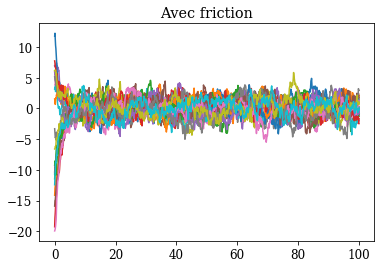

In [61]:
for i in range(20):
    pyplot.plot(t,x[:,i])
    pyplot.title('Avec friction')

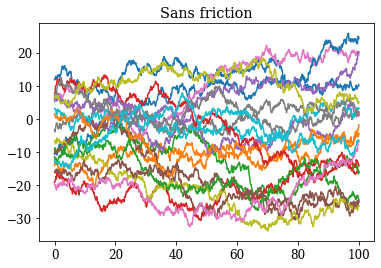

In [62]:
for i in range(20):
    pyplot.plot(t,xtest[:,i])
    pyplot.title('Sans friction')

On observe clairement que dans le cas avec friction (premier graphique), les trajectoires restent très regroupées, à cause de la friction. Traçons à présent les histogrammes.

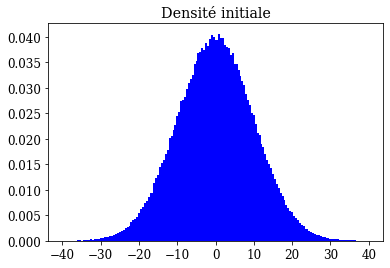

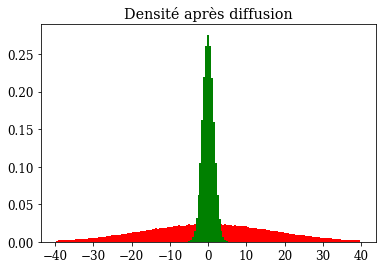

In [64]:
# Generate bins centered around 0
binwidth=0.5
bins=np.arange(-40,40,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot histrogram
pyplot.hist(x0,bins,density=True,color='b');
pyplot.title('Densité initiale')
pyplot.show()
pyplot.hist(xtest[nt],bins, color='red',density=True);
pyplot.hist(x[nt],bins, color='g',density=True);
pyplot.title('Densité après diffusion')
pyplot.show()



L'histogramme en rouge indique la courbe de densité sans le paramètre de friction et l'histogramme en vert indique celle de paramètre de friction $\gamma=0,1$. On observe donc que pour un coefficient de friction non-nul, la matière est diffusée moins rapidement. En fait, c'est plus radical : le paquet se contracte ! La raison en est que le terme que nous avons qualifié de friction n'est pas proportionnel à la vitesse, comme c'est typiquement le cas pour un fluide dans le bon régime. Il est proportionnel à $x$ et dès lors, il est toujours dirigé vers le centre du paquet, indépendamment de la direction dans laquelle se déplace la particule sur un intervalle de temps donné. 

Etudions à présent l'évolution de l'échantillon au cours du temps. Nous tenterons de réponde aux questions suivantes : Jusque quel point se contracte le paquet ? Y a-t-il un équilibre qui s'instaure ? Peut-on trouver une expression analytique pour la densité du paquet à un instant donné ? Quelle est l'équation qui gouverne le mouvement ?

 Toutes les quantités pertinentes ont déjà été calculées, il suffit donc de dessiner les histogrammes.

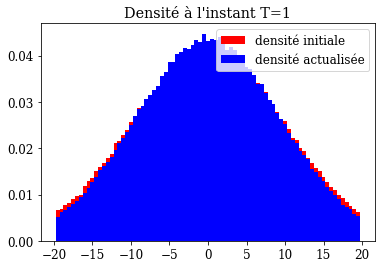

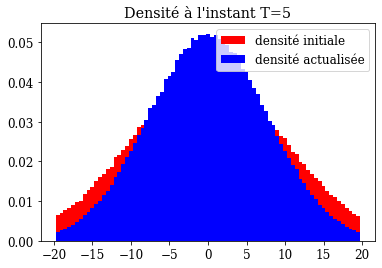

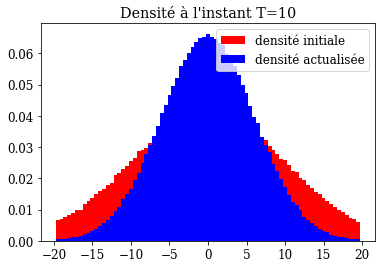

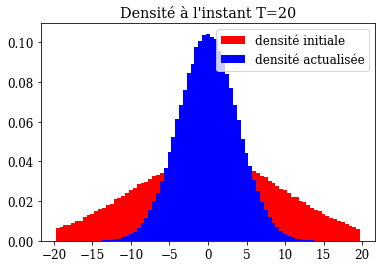

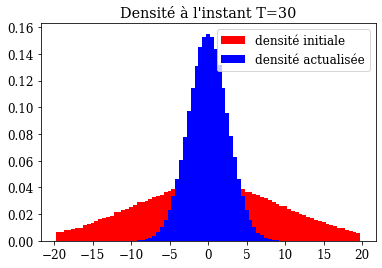

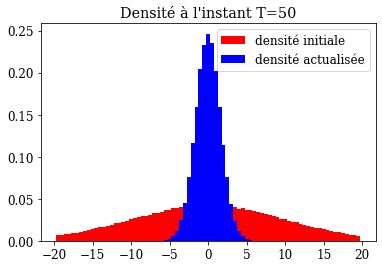

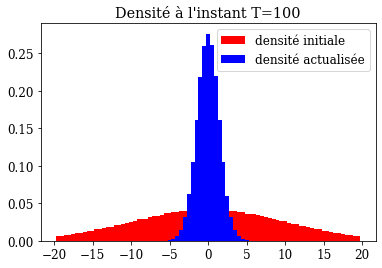

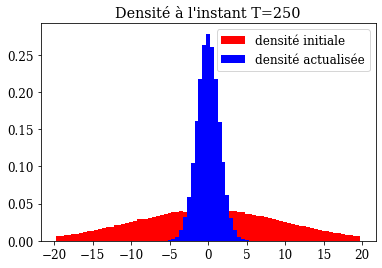

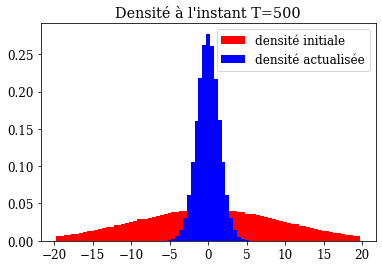

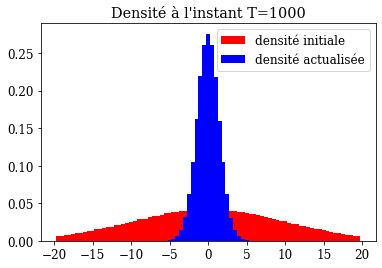

In [66]:
# Generate bins centered around 0
binwidth=0.5
bins=np.arange(-20,20,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

time=[1,5,10,20,30,50,100,250,500,1000]

for t in time:
    fig= pyplot.figure(figsize=(6,4))
    pyplot.hist(x[0],bins, color='r',density=True, label='densité initiale');
    pyplot.hist(x[t],bins, color='b',density=True, label='densité actualisée');
    pyplot.legend(loc="upper right")
    pyplot.title('Densité à l\'instant T=%i' %t)
    pyplot.show()

Comme le montrent les histogrammes ci-dessus, la densité atteint un état quasi-statique (i.e. globalement stable) après un temps de l'ordre de 50 secondes.


Il est donc clair que l'écart type diminue avec le temps. Autremenet dit, $\sigma(t)$ est une fonction décroissante. La moyenne n'est en revanche pas affectée. De plus, il est clair que $\sigma(t)$ tend vers une valeur constante pour des temps élevés, puisque la courbe se met à stagner. Dès lors, la solution de quasi-équilibre sera donéee par une distribution gaussienne de moyenne 0 et d'écart-type $\Sigma$ inconnu. Une façon de déterminer cet écart type serait d'effectuer un fit sur la courbe d'équilibre, puis de tenter d'exprimer l'écart-type obtenu comme une fonction des paramètres. Bien sûr, pour qu'une telle approche soit envisageable, il faut faire l'hypothèse que l'expression de l'écart-type à l'équilibre est simple, puisque dans le cas contraire, il serait difficile de déterminer cette expression. De plus, dans tous les cas, il y a une infinité de façons d'obtenir un nombre donné comme fonction des paramètres du problème. Pour s'assurer que l'expression analytique est valide, il faudrait donc faire varier les paramètres et vérifier que la courbe prédite correspond effectivement à celle que nous obtenons.

Cette démarche s'est avérée infructueuse. Nous avons alors tenté de trouver une expression simple de $\sigma$ en fonction de $\gamma$, mais n'avons pas réussi. Nous nous sommes donc tournés vers l'équation régissant le mouvement. Il nous semblait clair (c'est-à-dire que s'il y a des termes croisés, l'équation serait plus compliquée, et nous doutons que la position moyenne du paquet reste l'origine) qu'elle prendrait la forme suivante :

$$ \frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2}+\text{terme de friction} $$

Notre première tentative a été de se demander ce qui se passerait dans le cas non-stochastique, où le mouvement n'est dû qu'au terme de friction. Dans ce cas, 

$$ dx=-\gamma x dt \Rightarrow x(t)=x(0)\cdot e^{-\gamma t} $$

Il nous semblait donc naturel d'écrire : 

$$ d\rho=-\gamma \rho dt \Rightarrow \rho(x,t)=\rho(x,0)\cdot e^{-\gamma t} $$

Cependant, il est nécessaire que la densité de probabilité pour une molécule soit normée à l'unité : 

$$ \int_{-\infty}^{\infty} \rho(x,t) dx=1 $$

Ce qui n'est évidemment pas vérifiée si la solution est donnée par l'expression ci-haut, puisque dans ce cas : 

$$ \int_{-\infty}^{\infty} \rho(x,t) dx= \int_{-\infty}^{\infty} \rho(x,0)\cdot e^{-\gamma t} dx=e^{-\gamma t} $$

Nous nous sommes alors tournés vers l'analyse dimensionnelle. Cette dernière permet d'établir des contraintes sur la forme de l'équation, qui est nécessairement de l'une des deux formes suivantes (en rejetant le cas unidimensionnel puisqu'il est impossible d'y introduire naturellement le paramètre $\gamma$) :
$$ \frac{\partial \rho}{\partial t}=\frac{C^{te}}{\gamma}\frac{\partial^2 \rho}{\partial t^2} $$

Ou:

$$ \frac{\partial \rho}{\partial t}=\frac{C^{te}}{\gamma}\left(\frac{\partial \rho}{\partial t}\right)^2 $$

Le second cas est en fait équivalent à notre première tentative. Nous pouvons donc l'éliminer. Posant $u=\frac{\partial \rho}{\partial t}$ dans le second, on obtient... ça ne fonctionne pas, nous n'arrivons pas à trouver une équation pour laquelle la densité de probabilité résultante soit normalisée à l'unité. 



## The Ising model

### 5) [...] Check that this is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations.

In [158]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = np.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

La routine ci-haut génère un état de spins distribués aléatoirement pour une maille rectangulaire de taille $nx\cdot ny$. Prenons par exemple $nx=10=ny$.

In [159]:
sp = initial_state(10,10)
print(sp)

[[ 1 -1  1  1 -1 -1 -1 -1  1  1]
 [-1 -1  1  1  1 -1  1 -1  1 -1]
 [-1 -1  1  1  1  1 -1  1  1  1]
 [-1  1  1  1 -1 -1  1  1 -1  1]
 [-1 -1 -1  1  1 -1 -1  1  1  1]
 [ 1 -1  1  1 -1 -1  1 -1 -1  1]
 [ 1  1  1 -1  1  1 -1 -1 -1  1]
 [-1 -1  1  1  1  1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1 -1 -1  1 -1]
 [ 1 -1  1 -1 -1  1  1  1 -1 -1]]


La routine ci-dessus calcule l'énergie contenue dans les interactions d'un spin situé en $(ix,iy)$ avec ses premiers voisins.

In [161]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

La routine ci-dessous implémente l'algorithme de Metropolis. 

In [162]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

A présent, nous allons appliquer l'algorithme de Metropolis à chacun des spins de la maille, et vérifier que l'on obtient dans chaque cas le ratio prédit par la théorie.

In [163]:
#number of iterations
NMC = 10000

#size of lattice
nx=10
ny=10

# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1

#empty list of ratios 
th_ratios=[]
num_ratios=[]

#define an initial lattice state
sp=initial_state(10,10)

#iterate for every point in the lattice
for i in range(10):
    for j in range(10):

        #theoretical ratio
        up=energy_at_site(sp,alpha,1,i,j)
        down=energy_at_site(sp,alpha,-1,i,j)
        th_ratios.append(np.exp(-up)/np.exp(-down))
    
        #apply metropolis for sp, point (i,j)
        states = np.empty(NMC+1)
        states[0]=sp[i,j]
        for n in range(0,NMC):
            metropolis_at_site(sp,alpha,i,j)
            states[n]=sp[i,j]
    
        #numerical ratio
        ups = np.extract(states==1, states).size
        downs = NMC - ups
        num_ratios.append(ups/downs)
    
answer=np.array(num_ratios)-np.array(th_ratios)
out=np.around(answer, 2)
print(out)

[ 0.01  0.02  0.01  0.    0.    0.    0.    0.01  0.   -0.02  0.   -0.01
  0.01  0.01  0.   -0.   -0.01  0.    0.01 -0.    0.   -0.01  0.04 -0.01
  0.01  0.01  0.    0.   -0.    0.   -0.02  0.01  0.   -0.01 -0.   -0.
 -0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.    0.01  0.
 -0.03  0.    0.    0.   -0.01 -0.    0.    0.01  0.   -0.01  0.   -0.01
  0.   -0.03  0.   -0.    0.01  0.    0.   -0.    0.    0.01  0.01  0.
  0.01 -0.    0.    0.02  0.   -0.02  0.    0.    0.03 -0.02  0.    0.
 -0.    0.   -0.    0.    0.    0.    0.01 -0.    0.01  0.   -0.    0.
  0.01 -0.    0.   -0.  ]


L'algorithme fonctionne parfaitement bien (il y a convergence pour un nombre d'itérations tendant vers l'infini).

### 6) Perform a series of runs with $\alpha \in [0, 1]$ and plot the average energy of the system and its magnetisation as a function of $\alpha$. Estimate the critical value of $\alpha$ at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?

Remarque préliminaire : Le temps d'exécution de certains codes de cette section est long. Cependant, réduire la taille de la grille, le nombre de valeurs du paramètres, ... provoquent une diminution importante de la précision des résultats obtenus. 

On commence —de façon arbitraire— par construire une maille dont tous les spins pointent vers le haut (qui est donc entièrement magnétisée).

In [164]:
#lattice size
nx = 100
ny = 100

La routine ci-dessous implémente l'algorithme permettant de calculer un ensemble statistique (fini) d'états du système, à partir du modèle d'ising et de l'algorithme de Metropolis. 

In [165]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = np.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Nous allons maintenant calculer de telles collections d'états pour diverses valeurs de la constante de couplage $\alpha$ comprises entre 0 et 1.

In [166]:
#number of iterations 
NMC=100
#coupling constant values
alpha=[0.1+i/10 for i in range(7)]
#empty lists of states to fill
results=[]
#execute algo
for s in alpha:
    sp=np.ones([nx,ny]) #initial state
    results.append(ising_model_metropolis(sp, NMC, nx, ny, s))

**Remarque importante** : Nous avons pris une valeur beaucoup trop faible de NMC, afin de garder des temps de simulations exécutables relativement rapidement. Pour obtenir un résultat précis, il faudrait bien sûr augmenter ce nombre grandement. Nous nous sommes basés sur l'observation (voir ci-dessous) que, pour les valeurs de la constante de couplage choisies, la magnétisation atteint très rapidement son seuil minimal, après au maximum quelques dizaines d'itération. Le problème est que cette affirmation n'est valable que loin de la transition. En particulier, cela rend le calcul de l'énergie très difficile (ou plutôt très long pour un NMC plus élevé), près de la transition (voir commentaire de fin de section).

We will now be plotting the magnetization (sum of all spins), to determine where to impose the cut-off in the calculation of the average (as the system takes some time to reach a steady state).

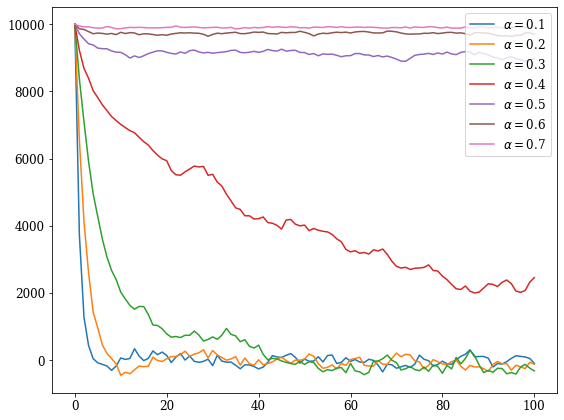

In [167]:
fig=pyplot.figure(figsize=(8,6))
for j in range(7):
    b=round(0.10+j*0.10,2)
    pyplot.plot(results[j].sum(axis=(1,2)),label=r'$\alpha=$'+str(b))
pyplot.legend(loc='upper right')
pyplot.tight_layout()

Nous observons ainsi que pour $\alpha \leq 0.3$, la magnétisation est quasiment nulle tandis qu'elle est devient quasiment maximale pour $\alpha=0,5$. Elle doit donc se produire quelque part entre ces deux valeurs. Pour affiner notre prédiction, on va à nouveau déterminer la magnétisation en fonction de $\alpha$ mais cette fois en prenant $\alpha \in [0,30;0,35;0,40;0,45;0,50]$.

In [169]:
new_results=[]
for s in [0.30,0.35,0.40,0.45,0.50]:
    sp=np.ones([nx,ny]) #initial state
    new_results.append(ising_model_metropolis(sp, NMC, nx, ny, s))

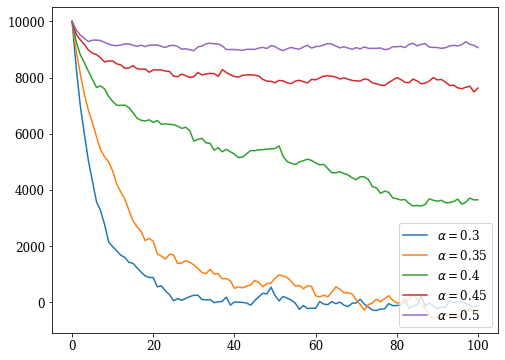

In [170]:
fig=pyplot.figure(figsize=(8,6))
for j in range(5):
    s=0.30+j*0.05
    pyplot.plot(new_results[j].sum(axis=(1,2)),label=r'$\alpha=$'+str(s))
pyplot.legend(loc='lower right')

On déduit du graphique ci-haut que $\alpha_{critique} \simeq 0.4$. A présent, nous allons déterminer la magnétisation en fonction d'alpha, en appliquant un cut-off à la cinquantième itération, afin de tenir compte du temps de relaxation du système. 

In [171]:
#cut-off
cutoff=50
useful=[]
for i in range(7):
    test=[]
    l=len(results[i])
    k=cutoff
    while k<l:
        test.append(results[i][k])
        k=k+1
    useful.append(test)
useful=np.array(useful)

Text(0.5, 1.0, 'Magnetization as a function of coupling constant')

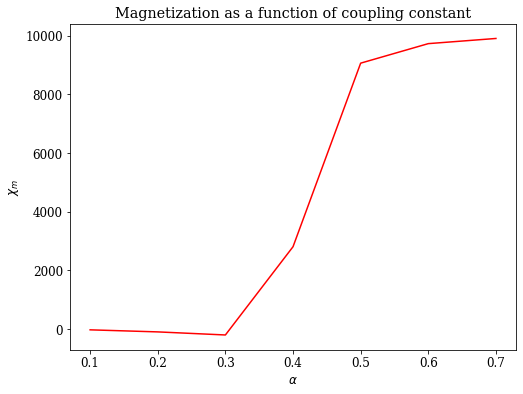

In [172]:
#Magnetization is sum of spins
magnetization=[]
for i in range(7):
    values=useful[i].sum(axis=(1,2))
    magnetization.append(np.mean(values))
#Plot magnetization as a function of alpha
fig,ax=pyplot.subplots(figsize=(8,6))
ax.plot(alpha,magnetization,color='r')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\chi_m$')
pyplot.title('Magnetization as a function of coupling constant')

On observe clairement la transition ! Calculons à présent l'énergie moyenne en fonction de la constante de couplage, ce qui est un peu plus compliqué, puisqu'il faut sommer sur l'ensemble des paires adjacentes, sans répétition. Pour ce faire, on va considérer, pour chaque spin, son interaction avec ses voisins du dessus et de droite.

In [173]:
averages=[] #average energy for each value of alpha
for i in range(7): 
    energies=[]
    for state in useful[i]:#for given state
        energy=0.0
        for jx in range(nx): #loop on all points in lattice
            for jy in range(ny):
                #energy of spin with first spins above and to the right
                energy=energy-alpha[i]*state[jx,jy]*(state[jx-1,jy]+state[jx,jy-1])
        energies.append(energy)
    averages.append(np.mean(energies))

Text(0.5, 1.0, 'Energy as a function of the coupling constant')

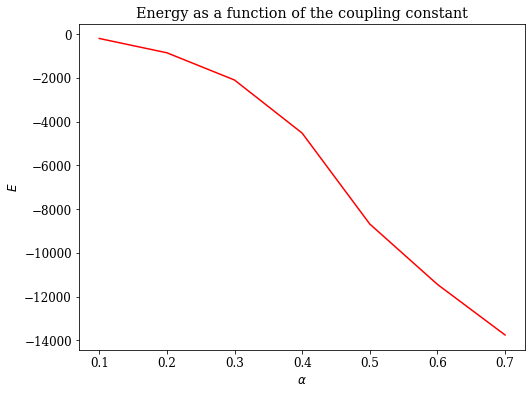

In [174]:
#Plot energy as a function of alpha
fig,ax=pyplot.subplots(figsize=(8,6))
ax.plot(alpha,averages,color='r')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$E$')
pyplot.title('Energy as a function of the coupling constant')

A nouveau, on observe clairement la transition. La valeur critique du paramètre de couplage concorde de plus avec la solution exacte d'Onsager. En effet, cellle-ci affirme que :

$$\alpha_c=\frac{\ln{\left(1+\sqrt {2}\right)}}{2}\simeq 0,44$$

Remarque importante : Sur le graphique présenté ci-haut, la transition de phase se traduit par une évolution continue du système, plutôt qu'un changement brutal. Ceci n'est pas innoncent : les transitions véritables ne peuvent se produire que dans des sytèmes dont le nombre de degrés de libertés est infini. Autrement dit, nous n'observons des transitions que dans la **limite thermodynamique**; dans un système fini, toutes les quantités physiques évoluent continûment. Dès lors, comme nous étudions ici un "toy model" constitué d'à peine 10 000 spins, la transition se produit sur un intervalle de valeurs du paramètres critiques, d'où la difficulté de déterminer une valeur précise de ce paramètre. Nous écrirons donc :

$$\alpha_c \in [0,3;0,5]$$

en accord avec la solution exacte d'Onsager.

### 7) Redo the analysis with a different set of boundary conditions for the lattice and a different initial lattice configuration. For example, you could assume that on the borders all the spins are pointing upwards on the borders while they are randomly oriented in the bulk.

On va prendre une maille aléatoire avec comme condition au bord que tous les spins du bord sont dirigés vers le haut.

In [176]:
#define initial states and boundary conditions
sp0=initial_state(100,100)
for i in range(100):
    sp0[0,i]=1
    sp0[i,0]=1
    sp0[99,i]=1
    sp0[i,99]=1

In [196]:
#number of iterations 
NMC=100
#coupling constant values
alpha=[0.1+i/10 for i in range(7)]
#empty lists of states to fill
answers=[]
#execute algo
for s in alpha:
    sp=sp0
    answers.append(ising_model_metropolis(sp, NMC, nx, ny, s))

Dans ce cas aussi, on peut tracer le graphe de la magnétisation au fil des itérations, pour chacune des valeurs de $\alpha$. On peut déterminer de la même façon la valeur critique de la constante de couplage.

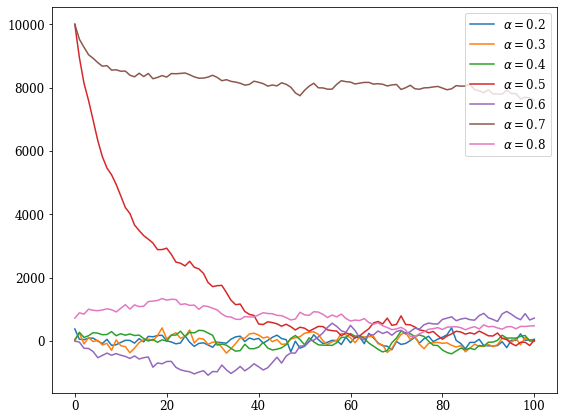

In [480]:
fig=pyplot.figure(figsize=(8,6))
for j in range(7):
    b=round(0.20+j*0.10,2)
    pyplot.plot(answers[j].sum(axis=(1,2)),label=r'$\alpha=$'+str(b))
pyplot.legend(loc='upper right')
pyplot.tight_layout()

On peut également recycler les codes de la section précédente pour tracer les graphiques de la magnétisation et de l'énergie en fonction du paramètre de couplage. Nous nous attendons à ce que le temps de relaxation augmente pour les cas marginaux post-transition mais qu'il diminue en moyenne, car on partira plus souvent d'une configuration plus proche de celle d'équilibre.

In [179]:
new_answers=[]
for s in [0.30,0.35,0.40,0.45,0.50]:
    sp=np.ones([nx,ny]) #initial state
    new_answers.append(ising_model_metropolis(sp, NMC, nx, ny, s))

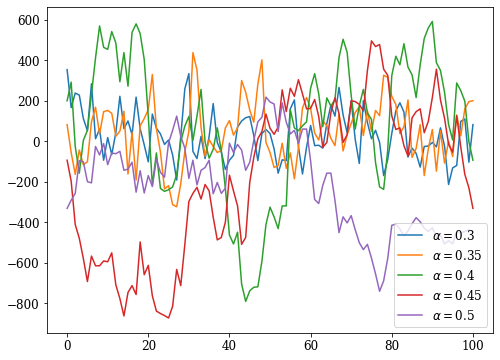

In [180]:
fig=pyplot.figure(figsize=(8,6))
for j in range(5):
    s=0.30+j*0.05
    pyplot.plot(answers[j].sum(axis=(1,2)),label=r'$\alpha=$'+str(s))
pyplot.legend(loc='lower right')

Comme précédemment, on peut ajouter les nouvelles solutions.

In [197]:
#cut-off
cutoff=50
out=[]
for i in range(7):
    test=[]
    l=len(answers[i])
    k=cutoff
    while k<l:
        test.append(answers[i][k])
        k=k+1
    out.append(test)
out=np.array(out)

Text(0.5, 1.0, 'Magnetization as a function of coupling constant')

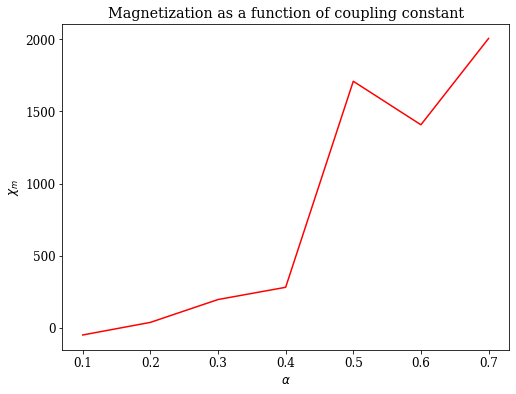

In [198]:
#Magnetization is sum of spins
magnetization=[]
for i in range(7):
    values=out[i].sum(axis=(1,2))
    magnetization.append(np.mean(values))
#Plot magnetization as a function of alpha
fig,ax=pyplot.subplots(figsize=(8,6))
ax.plot(alpha,magnetization,color='r')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\chi_m$')
pyplot.title('Magnetization as a function of coupling constant')

On observe à nouveau clairement la transition, qui semble cette fois survenir plutôt dans l'intervalle $[0,4;0,5]\subset [0,3;0,5]$.